In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from keras.layers import Dense,Convolution2D,Activation,MaxPooling2D,Flatten,Reshape,Input,UpSampling2D,ZeroPadding2D
from keras.models import Sequential,Model,load_model
from keras.utils import np_utils

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x = pd.read_csv("MNIST.csv")
X_ = np.array(x)

X = X_[:,1:]
X = X/255.0
X = X.reshape((X.shape[0],28,28,1))
y = X_[:,0]

# reconstruction : input and output are same
Y = X

print X.shape,y.shape,Y.shape

(42000, 28, 28, 1) (42000,) (42000, 28, 28, 1)


In [3]:
#encoder
inp = Input(shape=(28,28,1))


c1 = Convolution2D(32, (3,3), activation='relu',border_mode='valid')(inp)
c2 = Convolution2D(16, (3,3), activation='relu',border_mode='valid')(c1)
m1 = MaxPooling2D((2,2))(c2)
c3 = Convolution2D(8,(3,3), activation='relu', border_mode='same')(m1)
f1 = Flatten()(c3)
fc1 = Dense(64,activation='relu')(f1)

#decoder
fc2 = Dense(800,activation='relu')(fc1)
re1 =  Reshape((10,10,8))(fc2)
zp1 = ZeroPadding2D((1,1))(re1)
c4 = Convolution2D(16, (3,3), activation='relu',border_mode='same')(zp1)
u1 = UpSampling2D((2,2))(c4)
zp2 = ZeroPadding2D((1,1))(u1)
c5 = Convolution2D(32, (3,3), activation='relu',border_mode='same')(zp2)
zp3 = ZeroPadding2D((1,1))(c5)
c6 = Convolution2D(1, (3,3), activation='relu',border_mode='same')(zp3)

model = Model(input=inp,output=c6)
encoder = Model(input=inp,output=fc1)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                73792     
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", activation="relu")`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="valid", activation="relu")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same", activation="relu")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same", activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2

In [4]:
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

In [5]:
hist = model.fit(X,Y,
                 epochs = 10,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 49s 1ms/step - loss: 0.0412 - acc: 0.8048 - val_loss: 0.0170 - val_acc: 0.8133
Epoch 2/10
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0128 - acc: 0.8131 - val_loss: 0.0105 - val_acc: 0.8144
Epoch 3/10
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0095 - acc: 0.8138 - val_loss: 0.0084 - val_acc: 0.8149
Epoch 4/10
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0080 - acc: 0.8141 - val_loss: 0.0075 - val_acc: 0.8151
Epoch 5/10
33600/33600 [==============================] - 44s 1ms/step - loss: 0.0071 - acc: 0.8143 - val_loss: 0.0070 - val_acc: 0.8153
Epoch 6/10
33600/33600 [==============================] - 46s 1ms/step - loss: 0.0065 - acc: 0.8144 - val_loss: 0.0062 - val_acc: 0.8153
Epoch 7/10
33600/33600 [==============================] - 46s 1ms/step - loss: 0.0061 - acc: 0.8145 - val_loss: 0.0059 - val_acc:

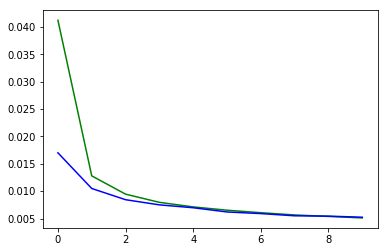

In [6]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

In [7]:
encoder.save('enc_64d.h5')

In [9]:
X_in = X[:10,:]
Y_out = model.predict(X_in)

X_in = X_in.reshape((X_in.shape[0],28,28))
Y_out = Y_out.reshape((Y_out.shape[0],28,28))
print X_in.shape,Y_out.shape

(10, 28, 28) (10, 28, 28)


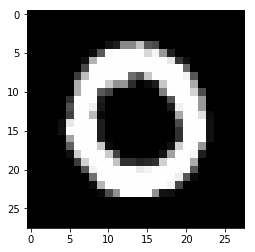

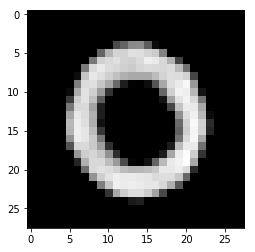

####################


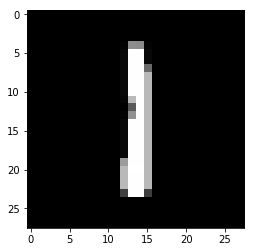

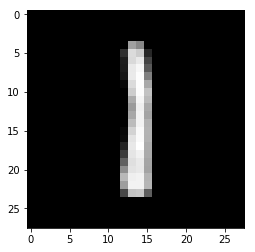

####################


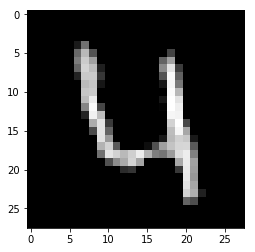

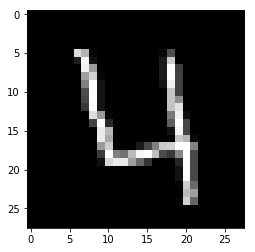

####################


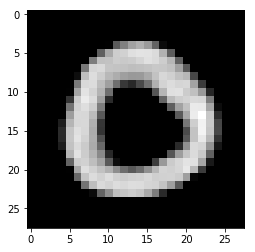

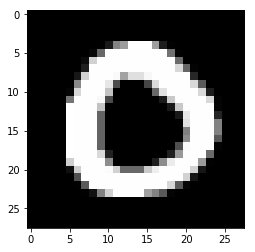

####################


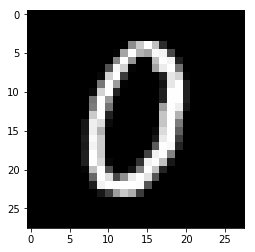

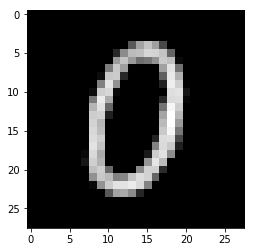

####################


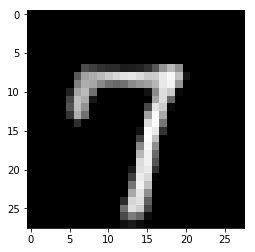

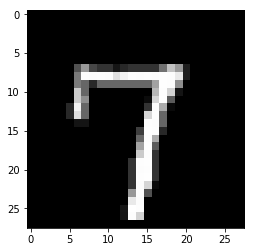

####################


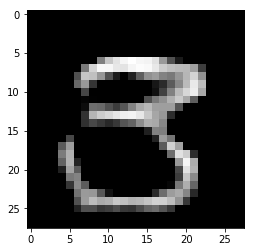

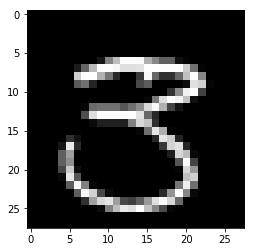

####################


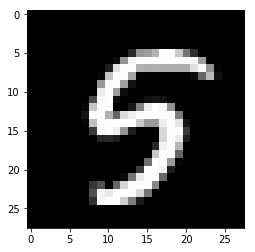

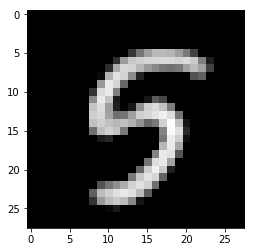

####################


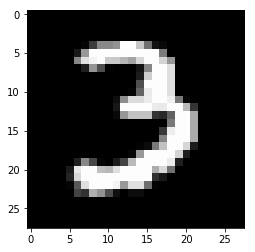

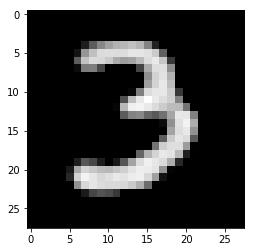

####################


In [15]:
for ix in range(1,10):
    plt.figure(ix)
    plt.imshow(X_in[ix],cmap='gray')
    plt.figure(3*ix)
    plt.imshow(Y_out[ix],cmap='gray')
    plt.show()
    print (20*'#')